In [ ]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.optimize import curve_fit

In [ ]:
nm_rome = open("data/l1_v5_ESPOCH_nogps_2016_05_06_00h00.cal")

all_ch = []
muon_ch = []

for line in nm_rome:
    tmp = line.rstrip('\n').split(' ')
    if tmp[0] != "#":
        all_ch.append(float(tmp[0]))
        muon_ch.append(float(tmp[6]))

all_ch = np.array(all_ch)
muon_ch = np.array(muon_ch)

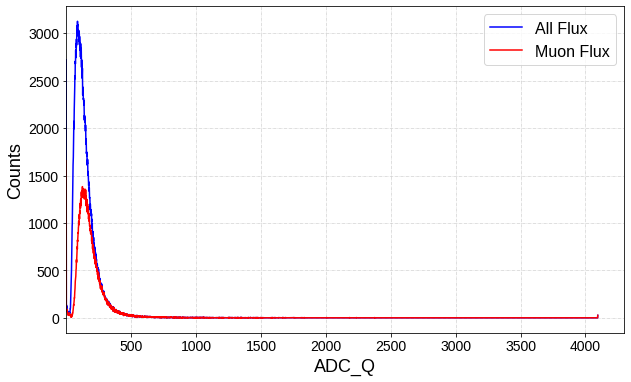

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(all_ch, "-b", label="All Flux")
plt.plot(muon_ch, "-r", label="Muon Flux")

plt.ylabel("Counts", fontname='Liberation Sans', fontsize=18)
plt.xlabel("ADC_Q", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.legend(prop={'family': 'Liberation Sans', 'size': 16})
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.xlim(1, )

plt.show()

In [ ]:
#nm_rome = open("data/l1_v5_ESPOCH_nogps_2016_05_06_00h00.cal")
nm_rome = open("data/l1_v5_jaguarito_nogps_2024_08_10_00h00.cal")


all_ch = []
muon_ch = []
n = 0
for line in nm_rome:
    tmp = line.rstrip('\n').split(' ')
    if tmp[0] != "#":
        all_ch.append(float(tmp[0]))
        muon_ch.append(float(tmp[3]))
        n += 1
    if n > 1000:
        break

all_ch = np.array(all_ch)
muon_ch = np.array(muon_ch)

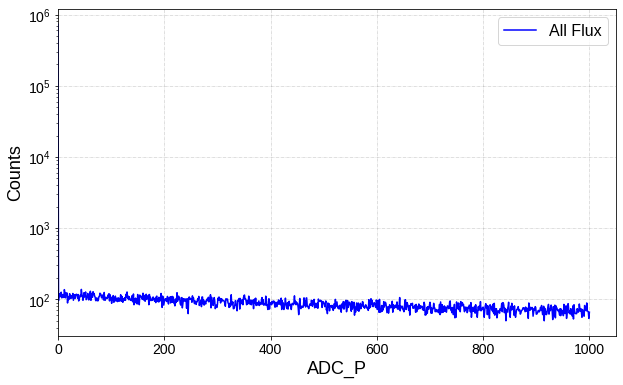

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(all_ch, "-b", label="All Flux")
#plt.plot(muon_ch, "-r", label="Muon Flux")

plt.ylabel("Counts", fontname='Liberation Sans', fontsize=18)
plt.xlabel("ADC_P", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.legend(prop={'family': 'Liberation Sans', 'size': 16})
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.xlim(0, )

plt.yscale('log')

plt.show()

In [ ]:
def read_files_and_create_dataframe(file_pattern):
    """
    Reads a series of files matching a pattern and creates a unique dataframe.

    Args:
        file_pattern (str): File pattern to match (e.g., '*.txt').

    Returns:
        pd.DataFrame: A combined dataframe with unique rows.
    """
    all_data = []

    # Iterate over all files matching the pattern
    for file_name in glob.glob(file_pattern):
        #print(file_name)
        with open(file_name, 'r') as file:
            lines = file.readlines()

        # Skip header lines starting with '#'
        data_lines = [line for line in lines if not line.startswith('#')]

        # Read the data into a pandas DataFrame
        # Column names are based on the format specified in the file description
        df = pd.DataFrame(
            [line.split() for line in data_lines],
            columns=[
                'second', 'temperature', 'pressure',
                'Total_Rate', 'Rate_channel_1', 'Rate_channel_2', 'Rate_channel_3'
            ]
        )

        # Ensure the correct data types
        df = df.astype({
            'second': int,
            'temperature': float,
            'pressure': float,
            'Total_Rate': int,
            'Rate_channel_1': int,
            'Rate_channel_2': int,
            'Rate_channel_3': int,
        })

        all_data.append(df)

    # Concatenate all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)

    # Drop duplicate rows to ensure the dataframe is unique
    unique_df = combined_df.drop_duplicates()

    return unique_df

In [ ]:
# Example usage
#file_pattern = 'data/Nahuelito_Marzo/l1_v5_nahuelito_2012_*.rte'
#file_pattern = 'ESPOCH/l1_v5_ESPOCH_nogps_2016_*00.rte'
#file_pattern = 'jaguarito/l1_v5_jaguarito_nogps_2024_*.rte'
#file_pattern = 'jaguarito/tri_1000/l1_v5_jaguarito_nogps_2024_08*.rte'
file_pattern = 'jaguarito/jaguarito_05/l1_v5_jaguarito_nogps_2024_05*.rte'
#file_pattern = 'panchito/l1_v5_t600_nogps_2024_05_01_00h00.rte'
unique_dataframe = read_files_and_create_dataframe(file_pattern)

# Optionally, save to a CSV file
#unique_dataframe.to_csv('ESPOCH_time_temp_press_rate.csv', index=False)

In [ ]:
unique_dataframe.head()

,second,temperature,pressure,Total_Rate,Rate_channel_1,Rate_channel_2,Rate_channel_3
0,1715317200,24.6,951.00,476,476,476,476
1,1715317201,24.6,951.02,476,476,476,476
2,1715317202,24.6,951.11,442,442,442,442
3,1715317203,24.6,951.12,444,444,444,444
4,1715317204,24.6,951.08,497,497,497,497


In [ ]:
unique_dataframe = unique_dataframe[unique_dataframe['second'] >= 1624122800]

In [ ]:
unique_dataframe['second'] = pd.to_datetime(unique_dataframe['second'], unit='s')

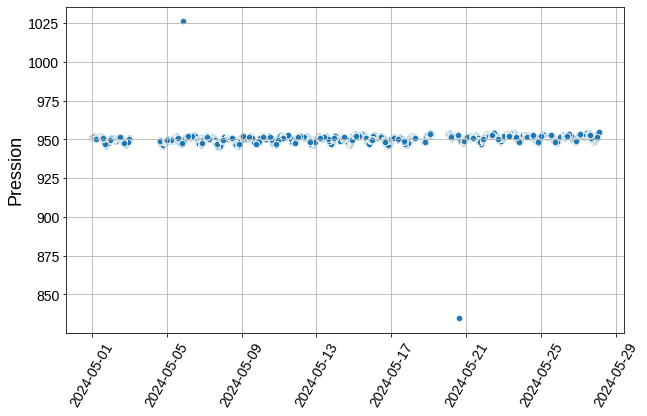

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unique_dataframe, x='second', y='pressure')

plt.ylabel("Pression", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

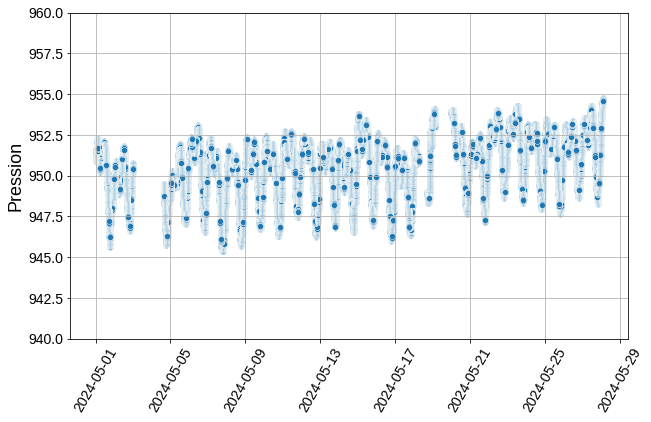

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unique_dataframe, x='second', y='pressure')

plt.ylim(940, 960)

plt.ylabel("Pression", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

In [ ]:
unique_dataframe = unique_dataframe[(unique_dataframe['pressure'] < 1000) & (unique_dataframe['pressure'] > 900)]

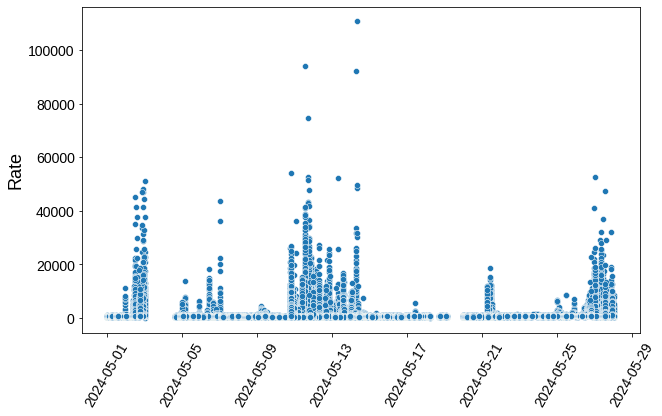

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unique_dataframe, x='second', y='Total_Rate')

#plt.ylim(0,2500)

plt.ylabel("Rate", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.show()

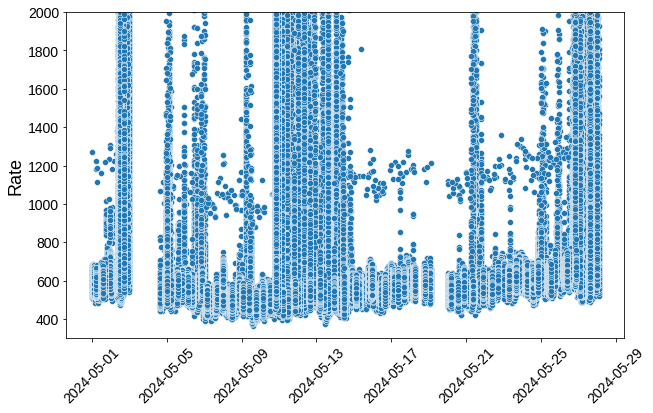

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unique_dataframe, x='second', y='Rate_channel_1')

plt.ylim(300,2000)

plt.ylabel("Rate", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=45)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.show()

In [ ]:
unique_dataframe = unique_dataframe[(unique_dataframe['Rate_channel_1'] < 1000) & (unique_dataframe['Rate_channel_1'] > 300)]

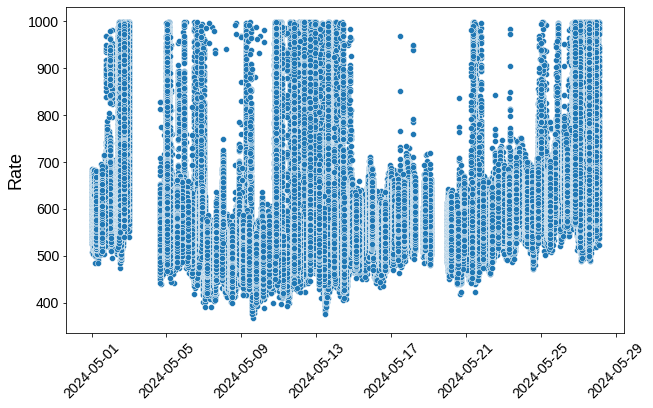

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unique_dataframe, x='second', y='Rate_channel_1')

#plt.ylim(300,800)

plt.ylabel("Rate", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=45)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.show()

# Doing rate per hour

In [ ]:
unique_dataframe['hour'] = unique_dataframe['second'].dt.floor('H')

# Aggregate the Total_Rate per hour
hourly_press = unique_dataframe.groupby('hour')['pressure'].mean().reset_index()
#unique_dataframe.head()
hourly_press.head()

,hour,pressure
0,2024-05-01 00:00:00,951.214565
1,2024-05-01 01:00:00,951.759997
2,2024-05-01 02:00:00,952.020122
3,2024-05-01 03:00:00,951.455606
4,2024-05-01 04:00:00,950.889266


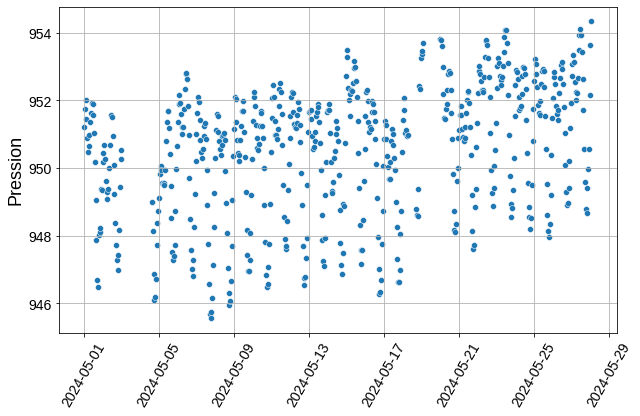

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_press, x='hour', y='pressure')

plt.ylabel("Pression", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

In [ ]:
unique_dataframe['hour'] = unique_dataframe['second'].dt.floor('H')

# Aggregate the Total_Rate per hour
hourly_rate = unique_dataframe.groupby('hour')[['pressure', 'Total_Rate']].mean().reset_index()
#unique_dataframe.head()
hourly_rate.head()

,hour,pressure,Total_Rate
0,2024-05-01 00:00:00,951.214565,600.710753
1,2024-05-01 01:00:00,951.759997,598.713889
2,2024-05-01 02:00:00,952.020122,598.225833
3,2024-05-01 03:00:00,951.455606,595.701667
4,2024-05-01 04:00:00,950.889266,589.632120


In [ ]:
hourly_rate['pressure'].min()

945.5728416666667

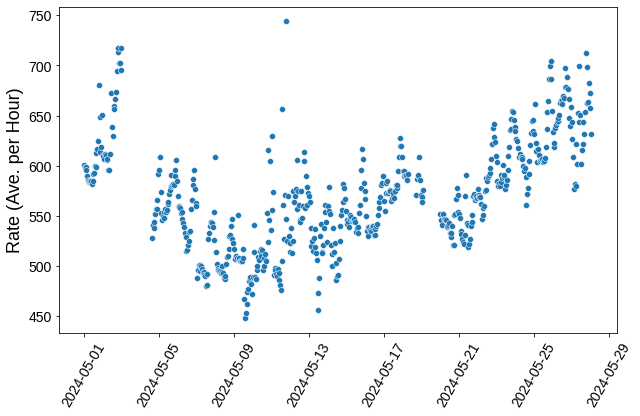

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_rate, x='hour', y='Total_Rate')

plt.ylabel("Rate (Ave. per Hour)", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.show()

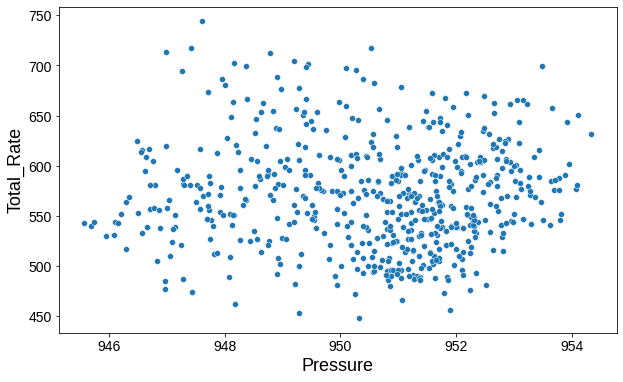

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_rate, x='pressure', y='Total_Rate')

#plt.ylim(280, 400)
#plt.xlim(950,959)

plt.ylabel("Total_Rate", fontname='Liberation Sans', fontsize=18)
plt.xlabel("Pressure", fontname='Liberation Sans', fontsize=18)

    plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.show()

In [ ]:
hourly_rate.head()

,hour,pressure,Total_Rate
0,2024-05-01 00:00:00,951.214565,600.710753
1,2024-05-01 01:00:00,951.759997,598.713889
2,2024-05-01 02:00:00,952.020122,598.225833
3,2024-05-01 03:00:00,951.455606,595.701667
4,2024-05-01 04:00:00,950.889266,589.632120


In [ ]:
i_prom = np.mean(hourly_rate['Total_Rate'])
p_prom = np.mean(hourly_rate['pressure'])

# Calculate deltaI and deltaP
deltaI = (hourly_rate['Total_Rate'] - i_prom) / i_prom
deltaP = hourly_rate['pressure'] - p_prom

# Define the linear model
def linear(x, a):
    return a * x

# Perform curve fitting
pars, cov = curve_fit(linear, deltaP, deltaI, p0=[0.])

# Print results
print("==============")
print("Beta = {:.3f} %".format(pars[0] * -100))
print("==============")

Beta = 0.064 %


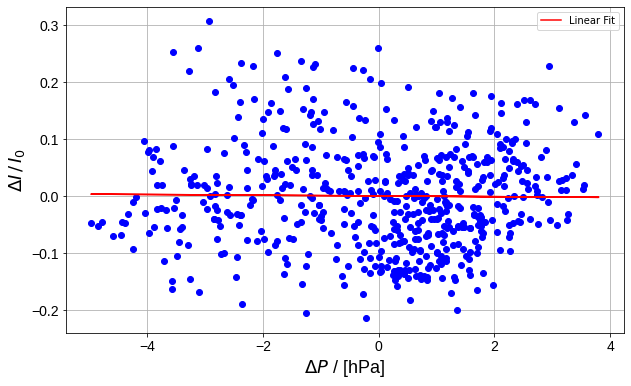

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(deltaP, deltaI, "ob")
plt.plot(deltaP, linear(deltaP, pars[0]), "-r", label="Linear Fit")

plt.ylabel("$\Delta I\,/\,I_0$", fontname='Liberation Sans', fontsize=18)
plt.xlabel("$\Delta P$ / [hPa]", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.legend()
plt.grid()
plt.show()

In [ ]:
deltaIc = deltaI - deltaP*pars[0]
i_corr = i_prom * ( 1 + deltaIc )

hourly_rate['Corrected_Rate'] = i_corr
hourly_rate['delta_Ic'] = deltaIc

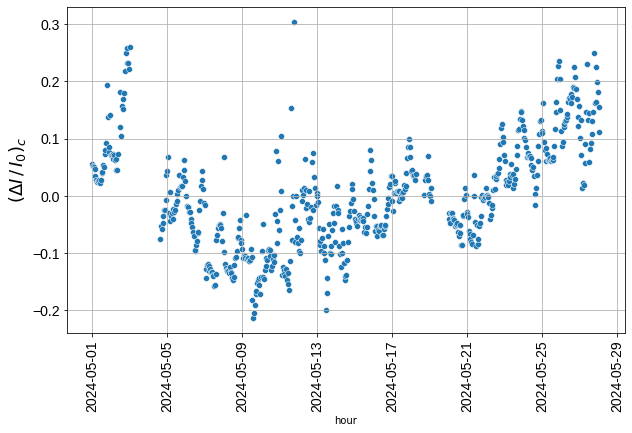

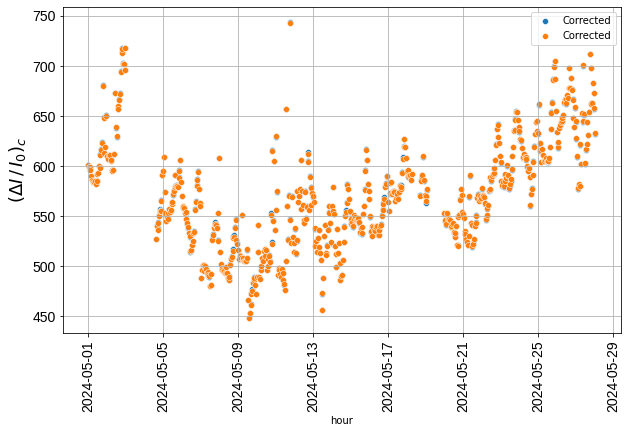

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_rate, x='hour', y='delta_Ic')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_rate, x='hour', y='Total_Rate', label='Corrected')
sns.scatterplot(data=hourly_rate, x='hour', y='Corrected_Rate', label='Corrected')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()
plt.show()

In [ ]:
pars[0] *= 11
print("\nBeta = {:.3f} %".format(pars[0] * -100))


Beta = 0.702 %


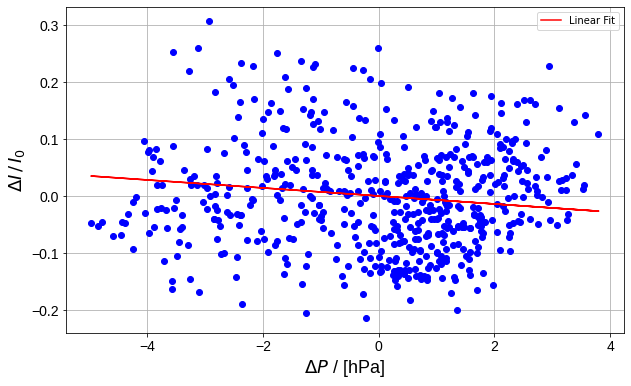

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(deltaP, deltaI, "ob")
plt.plot(deltaP, linear(deltaP, pars[0]), "-r", label="Linear Fit")

plt.ylabel("$\Delta I\,/\,I_0$", fontname='Liberation Sans', fontsize=18)
plt.xlabel("$\Delta P$ / [hPa]", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.legend()
plt.grid()
plt.show()

In [ ]:
deltaIc = deltaI - deltaP*pars[0]
i_corr = i_prom * ( 1 + deltaIc )

hourly_rate['Corrected_Rate'] = i_corr
hourly_rate['delta_Ic'] = deltaIc

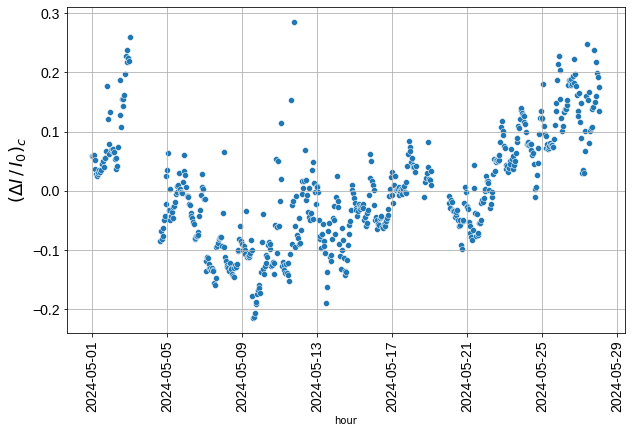

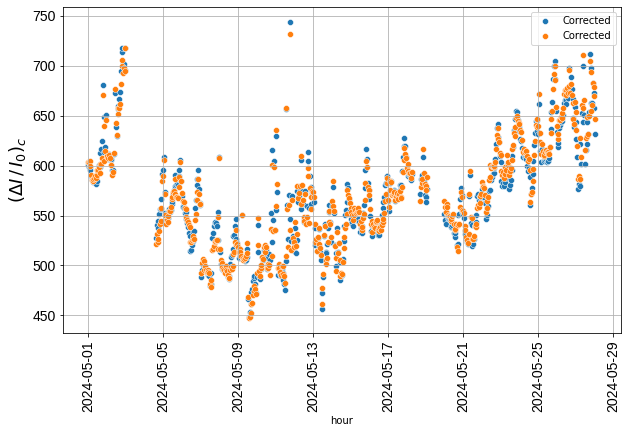

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_rate, x='hour', y='delta_Ic')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_rate, x='hour', y='Total_Rate', label='Corrected')
sns.scatterplot(data=hourly_rate, x='hour', y='Corrected_Rate', label='Corrected')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()
plt.show()

In [ ]:
# Read the file as a DataFrame
rome = pd.read_csv('data/press-rateUncorr_rome_may2024.dat',
                 sep=';',  # Specify the delimiter
                 parse_dates=['start_date_time', 'time2'])  # Parse datetime columns

# Display the DataFrame
print(rome)

        start_date_time    RPRESS               time2  RUNCORR
0   2024-05-01 00:00:00  1008.457 2024-05-01 00:00:00  123.302
1   2024-05-01 01:00:00  1008.147 2024-05-01 01:00:00  123.498
2   2024-05-01 02:00:00  1007.659 2024-05-01 02:00:00  123.390
3   2024-05-01 03:00:00  1007.388 2024-05-01 03:00:00  123.332
4   2024-05-01 04:00:00  1007.145 2024-05-01 04:00:00  123.632
..                  ...       ...                 ...      ...
658 2024-05-30 19:00:00  1006.944 2024-05-30 19:00:00  122.496
659 2024-05-30 20:00:00  1006.879 2024-05-30 20:00:00  122.051
660 2024-05-30 21:00:00  1006.278 2024-05-30 21:00:00  122.292
661 2024-05-30 22:00:00  1006.081 2024-05-30 22:00:00  123.322
662 2024-05-30 23:00:00  1005.859 2024-05-30 23:00:00  123.526

[663 rows x 4 columns]


In [ ]:
rome.drop(columns=['time2'], inplace=True)
rome.head()

,start_date_time,RPRESS,RUNCORR
0,2024-05-01 00:00:00,1008.457,123.302
1,2024-05-01 01:00:00,1008.147,123.498
2,2024-05-01 02:00:00,1007.659,123.390
3,2024-05-01 03:00:00,1007.388,123.332
4,2024-05-01 04:00:00,1007.145,123.632


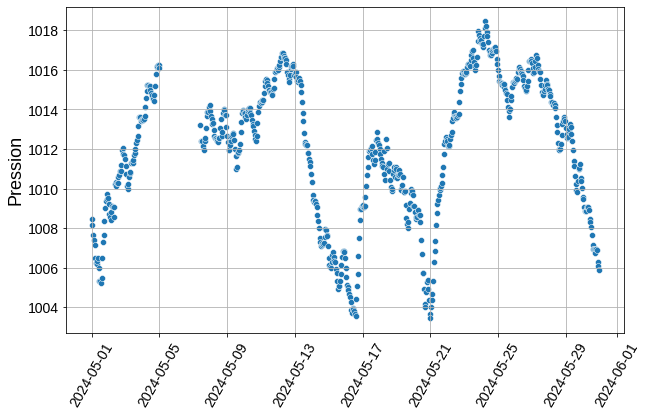

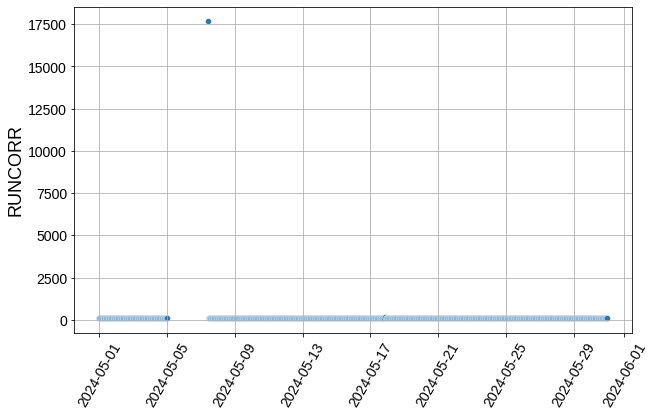

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=rome, x='start_date_time', y='RPRESS')

plt.ylabel("Pression", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

plt.figure(figsize=(10, 6))

sns.scatterplot(data=rome, x='start_date_time', y='RUNCORR')

plt.ylabel("RUNCORR", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

In [ ]:
rome = rome[rome['RUNCORR'] < 130]

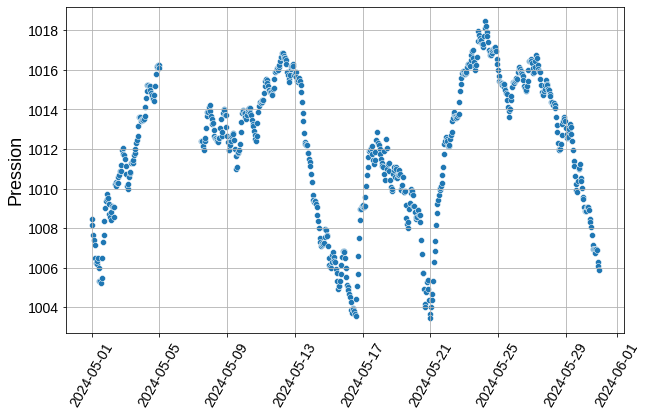

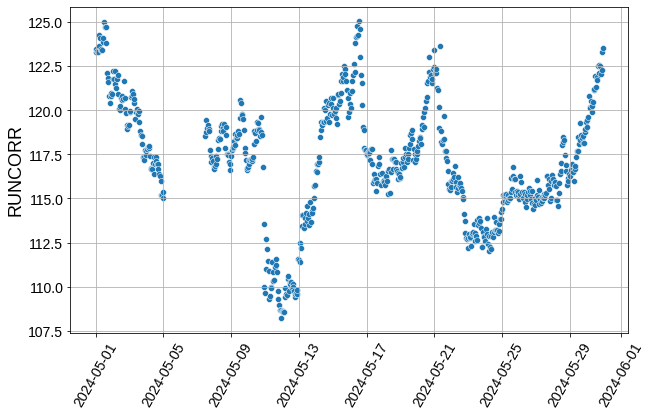

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=rome, x='start_date_time', y='RPRESS')

plt.ylabel("Pression", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

plt.figure(figsize=(10, 6))

sns.scatterplot(data=rome, x='start_date_time', y='RUNCORR')

plt.ylabel("RUNCORR", fontname='Liberation Sans', fontsize=18)
plt.xlabel("", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14, rotation=60)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()

In [ ]:
i_prom = np.mean(rome['RUNCORR'])
p_prom = np.mean(rome['RPRESS'])

# Calculate deltaI and deltaP
deltaI = (rome['RUNCORR'] - i_prom) / i_prom
deltaP = rome['RPRESS'] - p_prom

# Define the linear model
def linear(x, a):
    return a * x

# Perform curve fitting
pars, cov = curve_fit(linear, deltaP, deltaI, p0=[0.])

# Print results
print("===============")
print("Beta = {:.3f} %".format(pars[0] * -100))
print("===============")

Beta = 0.697 %


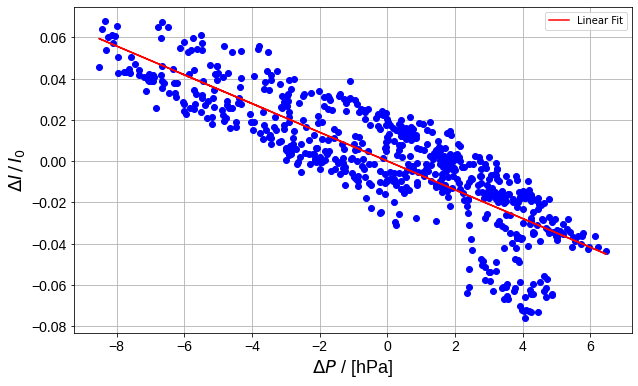

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(deltaP, deltaI, "ob")
plt.plot(deltaP, linear(deltaP, pars[0]), "-r", label="Linear Fit")

plt.ylabel("$\Delta I\,/\,I_0$", fontname='Liberation Sans', fontsize=18)
plt.xlabel("$\Delta P$ / [hPa]", fontname='Liberation Sans', fontsize=18)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.legend()
plt.grid()
plt.show()

In [ ]:
deltaIc = deltaI - deltaP*pars[0]
i_corr = i_prom * ( 1 + deltaIc )

rome['Corrected_Rate'] = i_corr
rome['delta_Ic'] = deltaIc

In [ ]:
rome.head()

,start_date_time,RPRESS,RUNCORR,Corrected_Rate,delta_Ic
0,2024-05-01 00:00:00,1008.457,123.302,120.425363,0.028161
1,2024-05-01 01:00:00,1008.147,123.498,120.368392,0.027675
2,2024-05-01 02:00:00,1007.659,123.390,119.862166,0.023353
3,2024-05-01 03:00:00,1007.388,123.332,119.583020,0.020970
4,2024-05-01 04:00:00,1007.145,123.632,119.684723,0.021838


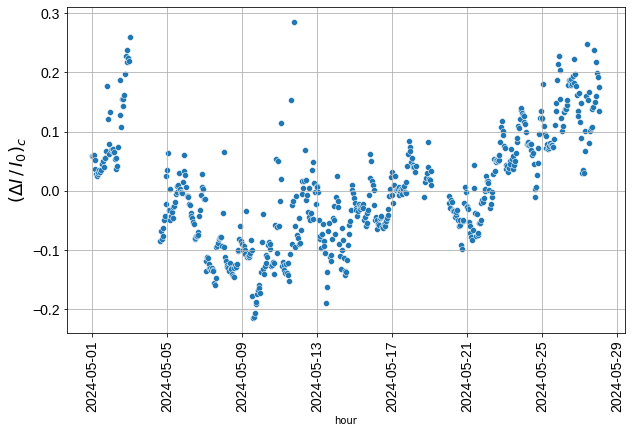

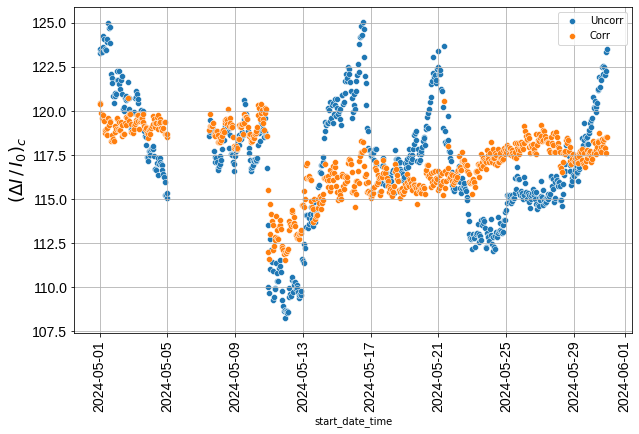

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=hourly_rate, x='hour', y='delta_Ic')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()

plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=rome, x='start_date_time', y='RUNCORR', label='Uncorr')
sns.scatterplot(data=rome, x='start_date_time', y='Corrected_Rate', label='Corr')

plt.ylabel("$(\Delta I\,/\,I_0)_{c}$", fontname='Liberation Sans', fontsize=18)
plt.xticks(rotation=90)

plt.xticks(fontname='Liberation Sans', fontsize=14)
plt.yticks(fontname='Liberation Sans', fontsize=14)

plt.grid()
plt.show()